<a href="https://colab.research.google.com/github/8dci/T5/blob/main/Week3_Ensemble_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Practice Notebook

Welcome to the practice notebook on ensemble methods! This notebook will guide you through the process of using ensemble techniques to predict customer churn. The dataset consists of various features related to bank customers, and your goal is to build predictive models to determine whether a customer will churn. Here is a brief explanation of the dataset's columns:

- **`customer_id`**: A unique identifier for each customer.
- **`credit_score`**: The customer's credit score.
- **`country`**: The country where the customer resides.
- **`gender`**: The customer's gender.
- **`age`**: The customer's age.
- **`tenure`**: The number of years the customer has been with the bank.
- **`balance`**: The customer's account balance.
- **`products_number`**: The number of bank products the customer uses.
- **`credit_card`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **`active_member`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **`estimated_salary`**: The customer's estimated annual salary.
- **`churn`**: The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).

As you work through the notebook, you will load the data, preprocess it, and apply various ensemble methods such as Random Forest to predict the churn status. Remember to evaluate the performance of your models using appropriate metrics. Enjoy your practice and aim to identify the most effective ensemble technique for this problem!

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

# Import Libraries

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from imblearn. over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Load the dataset


In [4]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
124,15779659,625,France,Female,28,3,0.00,1,0,0,183646.41,0
2875,15641640,545,Spain,Female,33,7,173331.52,1,1,0,150452.88,0
9133,15726776,705,Spain,Male,36,1,111629.29,1,1,1,21807.16,0
5921,15627203,508,Spain,Male,54,10,0.00,1,1,1,175749.36,0
5975,15758039,614,France,Male,44,6,0.00,2,0,1,104930.46,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


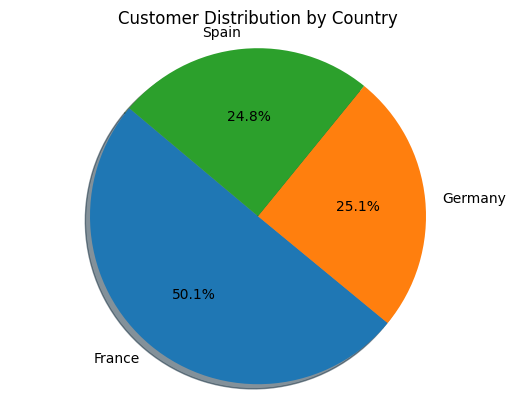

In [27]:
country_counts = df['country'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Customer Distribution by Country')
plt.show()

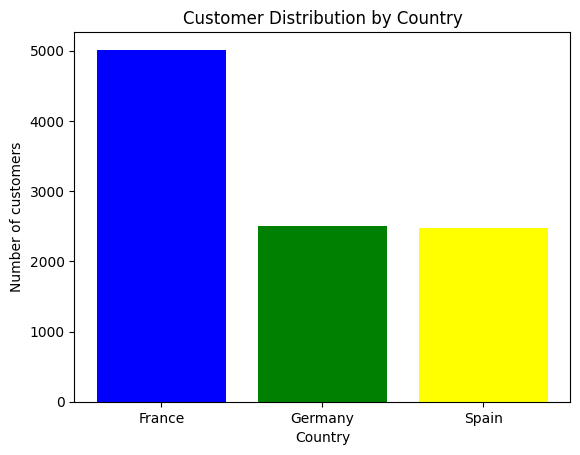

In [26]:
country_counts = df['country'].value_counts()
plt.bar(country_counts.index, country_counts.values, color=['blue', 'green', 'yellow'])
plt.xlabel('Country')
plt.ylabel('Number of customers')
plt.title('Customer Distribution by Country')
plt.show()

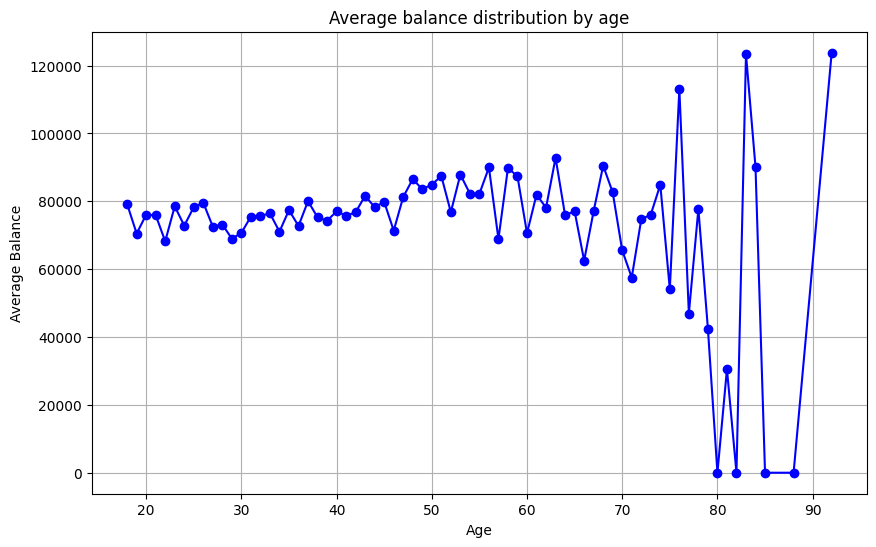

In [22]:
age_balance = df.groupby('age')['balance'].mean()
plt.figure(figsize=(10, 6))
plt.plot(age_balance.index, age_balance.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Balance')
plt.title('Average balance distribution by age')
plt.grid(True)
plt.show()

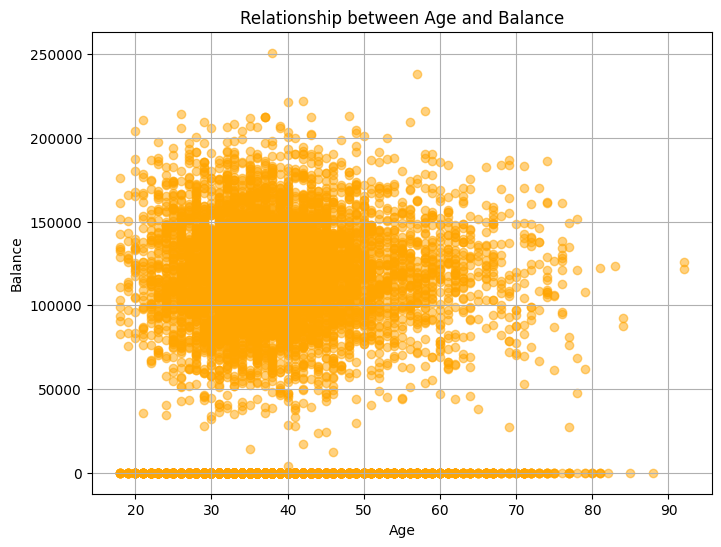

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['balance'], color='orange', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Relationship between Age and Balance')
plt.grid(True)
plt.show()

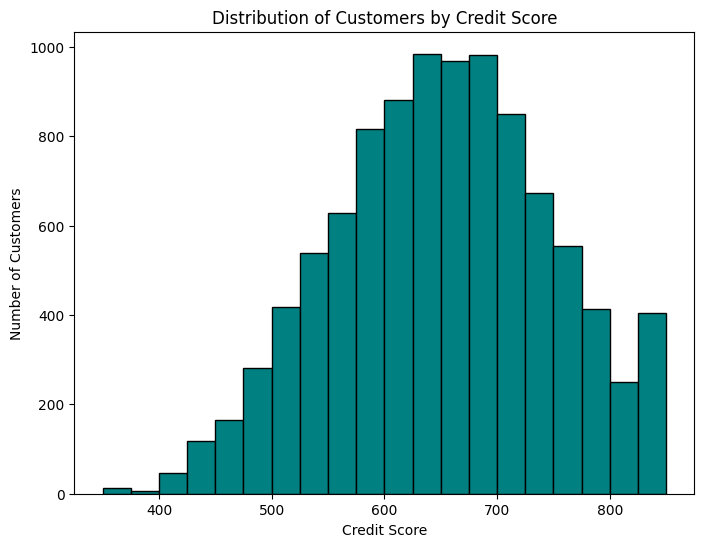

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(df['credit_score'], bins=20, color='teal', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Credit Score')
plt.show()

<Figure size 800x600 with 0 Axes>

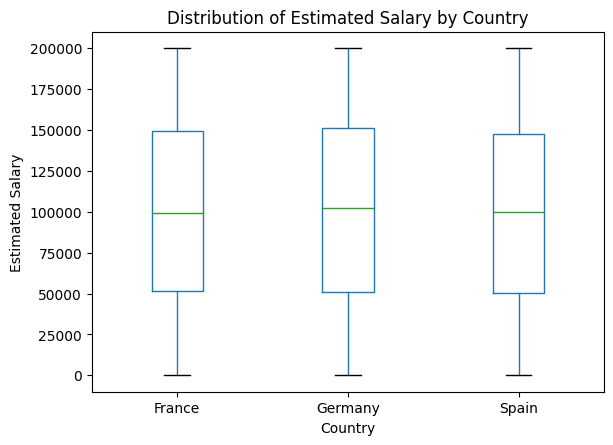

In [28]:
plt.figure(figsize=(8, 6))
df.boxplot(column='estimated_salary', by='country', grid=False)
plt.xlabel('Country')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary by Country')
plt.suptitle('')
plt.show()

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and anomalies in the dataset. Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `churn` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features to identify potential multicollinearity.

In [31]:
df.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-32-3dd11e29a680>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


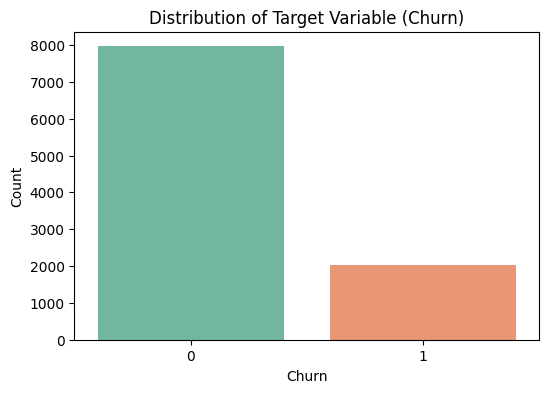

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

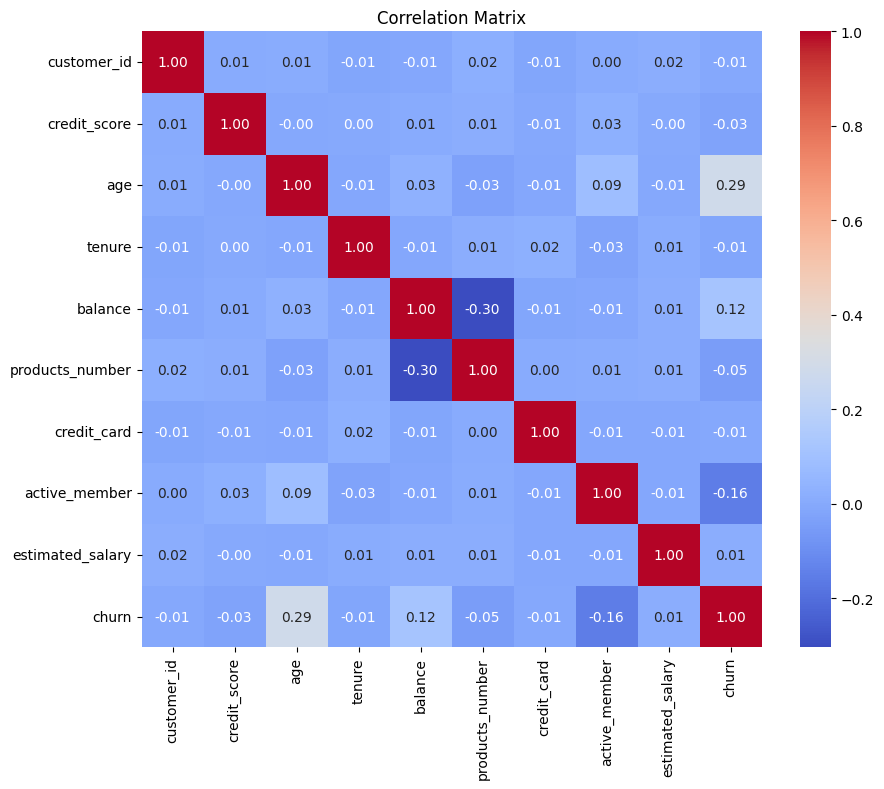

In [34]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding. In this dataset, the `country` and `gender` columns are categorical.

3. **Feature Scaling**: Standardize or Normalize numerical features to have a consistent scale, especially if you plan to use models sensitive to feature scaling. Consider using StandardScaler or MinMaxScaler from the `sklearn.preprocessing` module.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. For instance, `customer_id` is a unique identifier and doesn't contribute to predicting churn.

In [35]:
categorical_columns = ['country', 'gender']
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [36]:
numerical_columns.remove('customer_id')


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply the transformations and return the preprocessed DataFrame
df_preprocessed = preprocessor.fit_transform(df)

# Convert the preprocessed data back to a DataFrame with appropriate column names
# OneHotEncoder creates multiple columns, so we get the names from the encoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_columns = numerical_columns + list(encoded_columns)
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_columns)

# 4. Remove Unnecessary Columns
# Drop the original 'customer_id' since it's no longer needed
df_preprocessed.drop(columns=['customer_id'], inplace=True, errors='ignore')

# Display the preprocessed DataFrame
print("Preprocessed DataFrame:")
print(df_preprocessed.head())

Preprocessed DataFrame:
   credit_score       age    tenure   balance  products_number  credit_card  \
0     -0.326221  0.293517 -1.041760 -1.225848        -0.911583     0.646092   
1     -0.440036  0.198164 -1.387538  0.117350        -0.911583    -1.547768   
2     -1.536794  0.293517  1.032908  1.333053         2.527057     0.646092   
3      0.501521  0.007457 -1.387538 -1.225848         0.807737    -1.547768   
4      2.063884  0.388871 -1.041760  0.785728        -0.911583     0.646092   

   active_member  estimated_salary     churn  country_France  country_Germany  \
0       0.970243          0.021886  1.977165             1.0              0.0   
1       0.970243          0.216534 -0.505775             0.0              0.0   
2      -1.030670          0.240687  1.977165             1.0              0.0   
3      -1.030670         -0.108918 -0.505775             1.0              0.0   
4       0.970243         -0.365276 -0.505775             0.0              0.0   

   country_Spa

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Distribution of Numerical Features**: Plot histograms to see the distribution of numerical features such as `age`, `balance`, and `estimated_salary`.

2. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as `country`, `gender`, and `products_number`.

3. **Churn Rate Analysis**: Visualize the churn rate in relation to different features to identify patterns or factors that might influence churn.

4. **Pair Plot**: Use a pair plot to visualize relationships between numerical features and see how they are distributed across different classes of the target variable.

5. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

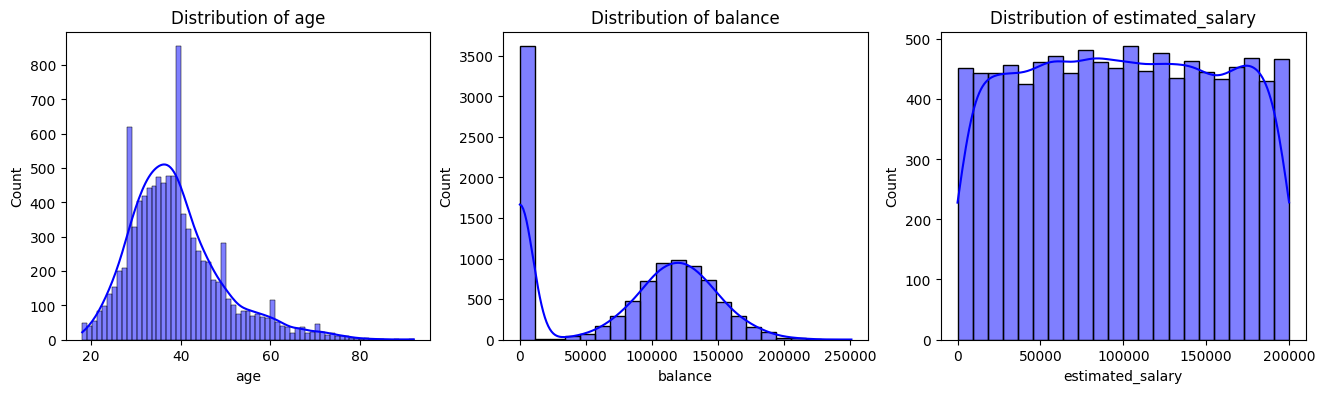

In [39]:
numerical_features = ['age', 'balance', 'estimated_salary']
plt.figure(figsize=(16, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
plt.show()

<ipython-input-40-da1735e6edfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-40-da1735e6edfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')
<ipython-input-40-da1735e6edfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


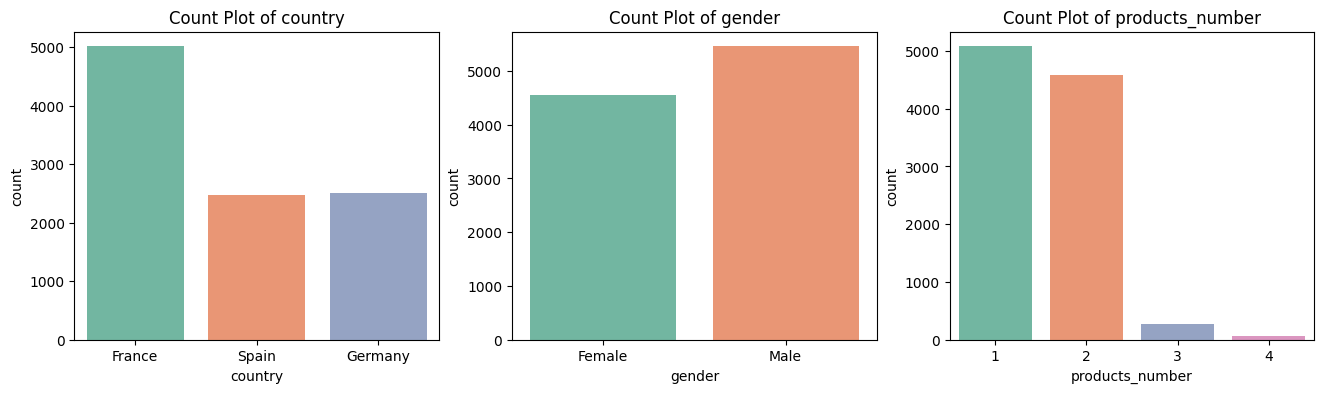

In [40]:
categorical_features = ['country', 'gender', 'products_number']
plt.figure(figsize=(16, 4))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Count Plot of {feature}')
plt.show()

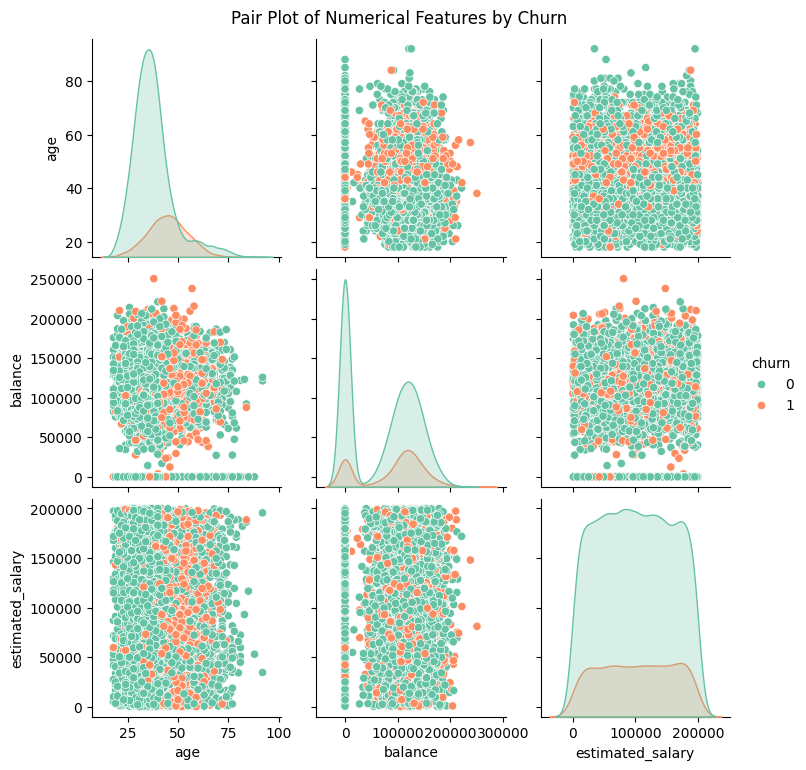

In [42]:
sns.pairplot(df, hue='churn', vars=numerical_features, palette='Set2')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02)
plt.show()


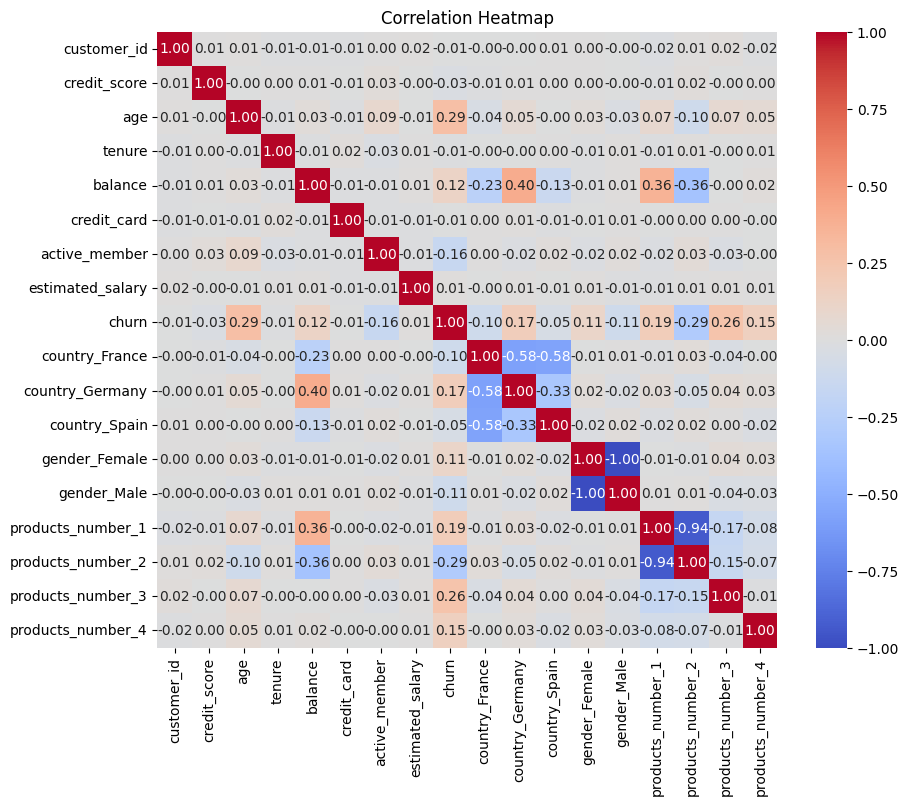

In [44]:
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['country', 'gender', 'products_number'])

# Calculate the correlation matrix on the encoded DataFrame
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Split the Dataset

Splitting the dataset into training and testing sets is essential for evaluating the performance of your models. This ensures that the models are trained and evaluated on separate data, providing an unbiased assessment of their predictive capabilities.

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data. Typically, 70-80% of the data is used for training, and 20-30% is used for testing.

In [45]:
# Assuming 'churn' is the target variable and the rest are features
X = df.drop(columns=['churn', 'customer_id'])  # Features
y = df['churn']  # Target variable

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')  # Handle potentially unseen categories in test data
X_train_encoded = ohe.fit_transform(X_train.select_dtypes(include='object'))
X_test_encoded = ohe.transform(X_test.select_dtypes(include='object'))

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude='object'))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude='object'))

# Combine encoded categorical and scaled numerical features
X_train_processed = np.hstack((X_train_scaled, X_train_encoded.toarray()))
X_test_processed = np.hstack((X_test_scaled, X_test_encoded.toarray()))

# Now fit the model with the processed data
rf_model = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100))
])
rf_model.fit(X_train_processed, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

### Evaluate the model performance

In [50]:
print(confusion_matrix(y_test, rf_model.predict(X_test_processed))) # Use the processed test data
print(classification_report(y_test, rf_model.predict(X_test_processed))) # Use the processed test data

[[2307   82]
 [ 324  287]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.78      0.47      0.59       611

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000



## XGBoost
Initialize and train an XGBoost classifier.

### Evaluate the model performance

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Train the Classifier
xgb_classifier.fit(X_train_processed, y_train) # Use preprocessed data

# 3. Make Predictions on the Test Set
y_pred = xgb_classifier.predict(X_test_processed) # Use preprocessed data


# 4. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[2292   97]
 [ 307  304]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.76      0.50      0.60       611

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize Base Models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize Meta-Learner (LogisticRegression)
meta_learner = LogisticRegression(random_state=42)

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)],
    final_estimator=meta_learner,
    cv=5  # Optional: Cross-validation for more robust performance
)


### Define meta-learner (LogisticRegression)

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize Meta-Learner (LogisticRegression)
meta_learner = LogisticRegression(random_state=42)


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [60]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming 'gender' is the categorical column containing 'Male' and other values
categorical_features = ['gender']  # Replace with the actual names of your categorical features
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_features)],
    remainder='passthrough'  # Keep the remaining numerical features
)

# Transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Initialize Base Models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize Meta-Learner (LogisticRegression)
meta_learner = LogisticRegression(random_state=42)

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)],
    final_estimator=meta_learner,
    cv=5  # Optional: Cross-validation for more robust performance
)

# Train the Stacking Classifier on the transformed data
stacking_classifier.fit(X_train_transformed, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression(random_state=42))

### Evaluate the model performance

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Example: Preprocessing Pipeline
categorical_features = ['country', 'gender']
numerical_features = ['age', 'balance', 'estimated_salary']

# Example: Define the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Split the data (Assume df is your dataframe and 'churn' is the target)
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the transformer on the training data
X_train_transformed = transformer.fit_transform(X_train)

# Initialize and train the stacking classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
meta_learner = LogisticRegression(random_state=42)

stacking_classifier = StackingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)],
    final_estimator=meta_learner,
    cv=5
)

# Train the stacking classifier on the transformed training data
stacking_classifier.fit(X_train_transformed, y_train)

# Transform the test data using the same transformer
X_test_transformed = transformer.transform(X_test)

# Make predictions on the transformed test data
y_pred = stacking_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Accuracy: 0.82
Confusion Matrix:
[[2287  102]
 [ 436  175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2389
           1       0.63      0.29      0.39       611

    accuracy                           0.82      3000
   macro avg       0.74      0.62      0.64      3000
weighted avg       0.80      0.82      0.79      3000



# Practice Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

* **Challenges and Learnings**
   - What were the main challenges you faced during this project, and how did you overcome them?
   - What are your key takeaways from this exercise, and how would you apply these learnings to future projects?


# Answer here: